# GA DSI-03: Project 3
Samir Poonawala

November 23, 2016

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
%matplotlib inline

## Maximum Likelihood Lab

In this lab we will look at the DMV waiting time example from the class. Let's look at the following situation:

You want to find out how long your mom will have to wait at the DMV. In order to determine the waiting time you stayed at the DMV for a while and measured the waiting time for the customers. You were playing on your phone and so you missed to to measure the exact time. Thus you started to collect the waiting times in the form (5, 0.3), which in this example means that the waiting time was somewhere between 5-0.3 and 5+0.3 minutes. 

Now that you have your data you want to build a model. You now assume that all waiting times $W_i$ are distributed with the same **but unknown** gamma distribution with **fixed but unknown** hyperparameters $\alpha$ and $\beta$ and that all waiting times $W_i$ are independent and thus

$$P_{(\beta, \alpha)}(W_1 \in A_1, W_2 \in A_2, ..., W_N \in A_N) = \Gamma_{(\beta, \alpha)}(W_1 \in A_1)\Gamma_{(\beta, \alpha)}(W_2 \in A_2)... \Gamma_{(\beta, \alpha)}(W_N \in A_N)$$

Please take a moment and think about the 3 major assumptions:
1. The waiting times are independet.
2. All waiting times are distributed from the same type of distribution.
3. We are certain that the hyperparameters take one specific value. We just don't know which one it is. 

**Exercise 1:**

Create a lambda expression for the Gamma distribution. You will need the gamma function $\Gamma$ which is available in the scipy.special package. Plot the Gamma distribution for 4 different combinations of $\beta$ and $\alpha$ onto the same graph. Describe how the hyperparameters $\beta$ and $\alpha$ change the shape of the distribution.

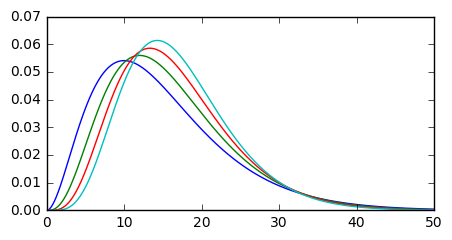

In [6]:
# can we use scipy.stats.gamma instead of scipy.special.gamma?
    # What's the difference between the two?

# Add four different combinations of alpha and beta to plot
# Iterate through list
alpha = [3,4,5,6]
beta = [.2,.25,0.3,0.35]

Gamma = lambda alpha, beta : lambda x: (beta**alpha)*(x**(alpha-1))*(np.exp(-x*beta))/gamma(alpha)
X = np.arange(0,50,0.1)
ziped = zip(alpha, beta)
fig, ax = plt.subplots(1,1,figsize=(5,2.5))
for z in ziped:
    ax.plot(X,Gamma(*z)(X))

**Exercise 2:**

The data points that you collected are in the below list denoted by waiting_time. Each of the tuples in the list represents an interval of time that you measured. You can now use the below data points to calculate the probability of the measured intervals as a function of $(\beta, \alpha)$

$$(\beta, \alpha) \to P_{(\beta, \alpha)}( W_1 \in [3.8,4.2), W_2 \in [3.5, 4.5), W_3 \in [4.1, 5.9), ...)$$

Create a lambda expression that maps every pair $(\beta, \alpha)$ onto the probability and craete a 3D plot. You will need to use numpy.vectorize to vectorize the lambda expression. Numpy converts the lambda expression so that it can take numpy arrays as arguments. Look into last weeks notes to find out how to plot a 3D plot.

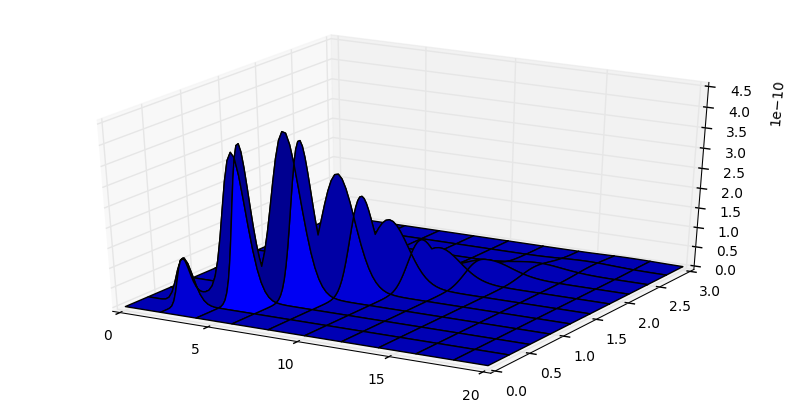

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad
%matplotlib inline

waiting_time =[(4,0.2),(4,0.5), (5,0.9), (6,0.2), (4,0.2), (6,0.2), (5,0.6), (15,0.6)]

Gamma = lambda alpha, beta : lambda x: (beta**alpha)*(x**(alpha-1))*(np.exp(-x*beta))/gamma(alpha)
X = np.arange(0,50,0.1)

# Convert to iterable?


prob = (lambda y,z: 
                    quad(lambda l: Gamma(y,z)(l), 3.8, 4.2)[0]*
                    quad(lambda l: Gamma(y,z)(l), 3.5, 4.5)[0]*
                    quad(lambda l: Gamma(y,z)(l), 4.1, 5.9)[0]*
                    quad(lambda l: Gamma(y,z)(l), 5.8, 6.2)[0]*
                    quad(lambda l: Gamma(y,z)(l), 3.8, 4.2)[0]*
                    quad(lambda l: Gamma(y,z)(l), 5.8, 6.2)[0]*
                    quad(lambda l: Gamma(y,z)(l), 4.4, 5.6)[0]*
                    quad(lambda l: Gamma(y,z)(l), 14.4, 15.6)[0])

# numpy.linspace(): 
    # returns num evenly spaced samples, calculated over the interval [start, stop]

x = np.linspace(0.01, 20, 100)
y = np.linspace(0.01, 3, 100)
x, y = np.meshgrid(x,y)
z = np.vectorize(prob) # What does this do?
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(x, y, z(x,y))

**Exercise 3:**

Each of the points $(\beta, \alpha)$ represents a model that we could pick and the plot shows us how likely the measured waiting times are if we would have fixed $(\beta, \alpha)$ at the respective values. We now have to make a decision which pair $(\beta, \alpha)$ we want to pick. One way to approach this decision problem is to pick the $(\beta, \alpha)$ pair which produces the highest probability for the measured event. This approach is called **Maximum Likelihood**. 

Use the minimize function in the scipy.optimize package to find the maximum likelihood. You will have to change the function so that the maximum becomes the minimum. Additionally, minimize only takes functions of one variable. You will have to change your function so that it takes a list as an argument and not two numbers. minimize looks for a minimum around an initial point x0. You will have to provide such a point. Use method = 'Nelder-Mead'. 

See below for an example of how to use minimize.

In [22]:
# ORIGINAL CODE FROM ASSIGNMENT
funx = lambda x: x[0]**2 + x[1]**2
x0 = [9,6]
funxMin = minimize(funx, x0, method = 'Nelder-Mead')
funxMin.x

array([  3.81643776e-05,   2.85728351e-05])

In [23]:
from scipy.optimize import minimize
prob1 = lambda x: -prob(x[0], x[1])
x0 = [1,10]
funxMin = minimize(prob1, x0, method = "Nelder-Mead")
funxMin.x

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


array([ 4.95834716,  0.81042859])

**Exercise 4:**

Now that we have our maximum likelihood solution we can take a step back and think about what we just did. 

* (A) Take a look at the plot and remind yourself that minimize looks for a solution around an initial point x0. What's the problem with that?
* (B) We assumed that the outcome that we measured is the outcome with the highest probability. Take a look at the actual probability of getting what we measured under the assumption of the model. How likely was it? 
* (C) Take a moment and check out what the outliers in the data are. How do those data points effect the solution in light of the above point and why?
* (D) Can you think of a way to make a better decision?

In [24]:
#(A) We could end up at a local minimum rather than a global minimum

#(B)
prob(4.95834716,  0.81042859)

#(C) 
    # The only outlier in the data is probably (15,0.6)
    # This likely reduced the probability of the model

#(D) Could rerun model excluding outliers

4.142370215021342e-10

**Exercise 5:**

Plot the distribution of the maximum likelihood solution together with a normed histogram of the waiting times. What can you observe and how does this relate to Exercise 4?

(array([ 0.51136364,  0.34090909,  0.34090909,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.17045455]),
 array([  4.        ,   4.73333333,   5.46666667,   6.2       ,
          6.93333333,   7.66666667,   8.4       ,   9.13333333,
          9.86666667,  10.6       ,  11.33333333,  12.06666667,
         12.8       ,  13.53333333,  14.26666667,  15.        ]),
 <a list of 15 Patch objects>)

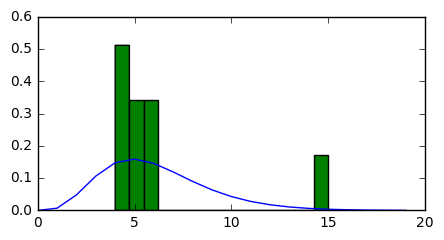

In [35]:
alpha = [4.95834716]
beta = [0.81042859]

Gamma = lambda alpha, beta : lambda x: (beta**alpha)*(x**(alpha-1))*(np.exp(-x*beta))/gamma(alpha)
hist_values = [x for x, a in waiting_time]
X = np.arange(0,20,1)
fig, ax = plt.subplots(1,1,figsize=(5,2.5))
ax.plot(X,Gamma(4.95834716, 0.8104285)(X))
ax.hist(hist_values, normed = True, bins = 15)

In [36]:
# We can see the outlier that we identified in exercise 4 
# more clearly distinguished from the remaining observations

**Exercise 6:**

Calculate the Mean and the Variance of the maximum likelihood distribution using integration. 

Remember: The Mean of the distribution $E[W]$ is the expected waiting time and the square root of the variance $\sqrt{Var[W]}$ is the expected range of waiting times.

In [47]:
from scipy import integrate

mean = integrate.quad(lambda x: x * Gamma(4.95834716, 0.81042859)(x),0,20)
print("Expected wait time: {}".format(mean[0]))

variance = integrate.quad(lambda x: ((x - mean[0])**2) * Gamma(4.95834716, 0.81042859)(x), 0, 20)
print("Variance: {}".format(variance[0]))

Expected wait time: 6.11122615913
Variance: 7.4715737543
7.54931285791


**Exercise 7:**

Use the minimize function to calculate the waiting time with the highest probability and its respective probability. Compare your result to the result of Exercise 6. Does this make you think about a better decision methedology for $(\beta, \alpha)$?

In [50]:
from scipy.optimize import minimize
f = lambda x: -Gamma(4.95834716, 0.81042859)(x[0])
x0 = [1,10]
funxMin = minimize(f, x0, method = "Nelder-Mead")
funxMin.x

array([ 4.88426394, -8.42830824])